In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Downloads/archive/Sales_Product_Details.csv")

In [3]:
data.head(5)

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000


In [4]:
data.describe()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Latitude,Longitude
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.021062e+07,57.400000,279.733333,2.066667,40.498759,79.687953,52.237571,-2.270437
std,8.803408e+00,31.457251,24.259990,1.142693,16.742578,43.008559,1.449567,1.367443
min,2.021060e+07,9.000000,251.000000,1.000000,21.965812,21.965812,50.259998,-5.051000
25%,2.021061e+07,32.500000,262.250000,1.000000,32.390679,36.774078,51.063202,-2.647000
50%,2.021062e+07,51.000000,276.000000,2.000000,36.191911,79.261696,52.192001,-1.490000
75%,2.021062e+07,90.750000,287.500000,3.000000,44.341442,113.761987,53.680000,-1.353500
max,2.021063e+07,99.000000,357.000000,4.000000,117.306016,175.486148,53.958332,-1.080278


In [5]:
data.isnull().count()

Date                   30
Customer_ID            30
Product_ID             30
Quantity               30
Unit_Price             30
Sales_Revenue          30
Product_Description    30
Product_Category       30
Product_Line           30
Raw_Material           30
Region                 30
Latitude               30
Longitude              30
dtype: int64

In [6]:
import seaborn as sns

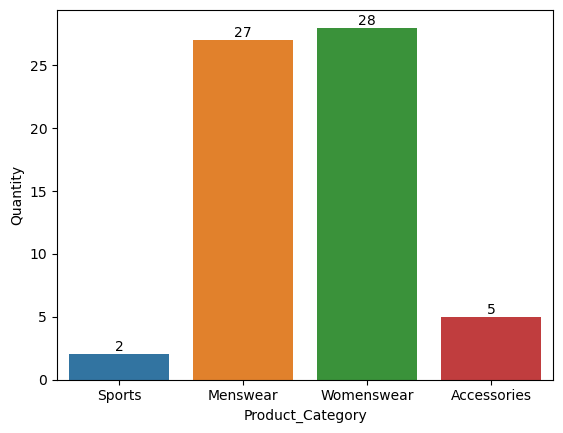

In [7]:
chart = sns.barplot(x='Product_Category', y='Quantity', data=data, estimator=sum, errorbar=None)
chart.bar_label(chart.containers[0], fontsize=10);

In [8]:
womenwear = data[data['Product_Category'] == 'Womenswear']['Product_Line']
print(womenwear)

4     Trousers
8         Tops
9         Tops
13        Tops
16        Tops
17        Tops
18    Trousers
19    Trousers
21        Tops
22        Tops
23        Tops
24        Tops
28        Tops
Name: Product_Line, dtype: object


In [9]:
bestProduct = data[data['Sales_Revenue'] == max(data['Sales_Revenue'])]
bestProduct

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
15,20210616,31,265,4,43.871537,175.486148,Suits,Menswear,Tops,Wool,Wakefield,53.68,-1.49


In [10]:
data[data['Unit_Price']==max(data['Unit_Price'])]

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278


In [11]:
data['Product_Line'].value_counts()

Product_Line
Tops        23
Trousers     5
Leathers     1
Shoes        1
Name: count, dtype: int64

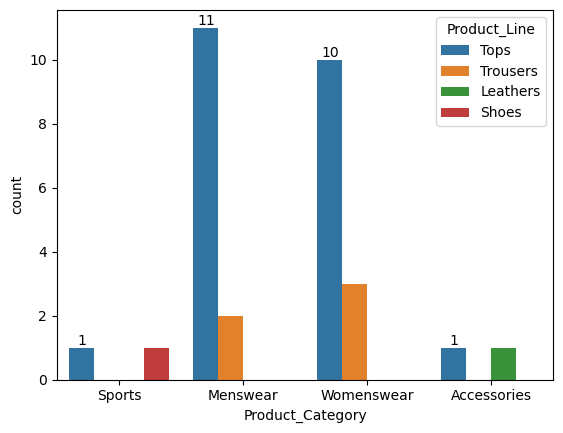

In [12]:
chart1 = sns.countplot(data, x="Product_Category", hue="Product_Line")
chart1.bar_label(chart1.containers[0], fontsize=10);

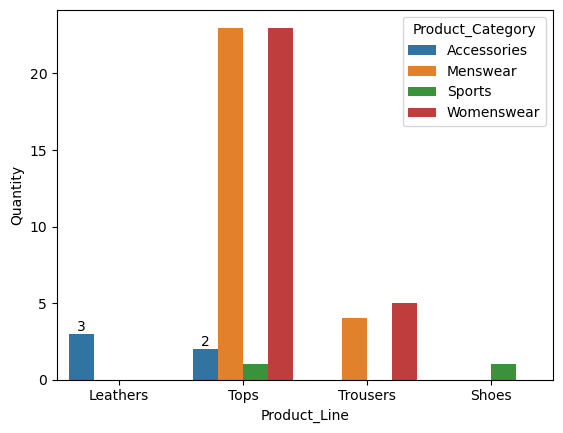

In [13]:
grouped_data = data.groupby(['Product_Category', 'Product_Line']).sum().reset_index()
chart2=sns.barplot(x='Product_Line', y='Quantity', hue='Product_Category', data=grouped_data)
chart2.bar_label(chart2.containers[0], fontsize=10);

In [14]:
grouped_data=grouped_data.drop(['Latitude',	'Longitude'], axis=1)

In [15]:
grouped_data

,Product_Category,Product_Line,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Raw_Material,Region
0,Accessories,Leathers,20210606,97,304,3,49.887524,149.662573,Belts,Leather,Wells
1,Accessories,Tops,20210607,45,357,2,35.416016,70.832032,Ties,Leather,Wakefield
2,Menswear,Tops,222316764,682,2955,23,379.330090,793.423894,Casual ShirtsCasual ShirtsPolo ShirtsFormal Sh...,CottonCottonCottonWoolCottonCottonCashmereWool...,WorcesterWorcesterWakefieldWakefieldWakefieldY...
3,Menswear,Trousers,40421231,114,539,4,79.916022,139.742829,JeansPants,CottonLeather,WinchesterWorcester
4,Sports,Shoes,20210621,90,336,1,21.965812,21.965812,GolfShoes,Leather,Truro
5,Sports,Tops,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Fabrics,York
6,Womenswear,Tops,202106191,398,2776,23,409.369131,893.108260,TshirtsFormal ShirtsKnitwearSweatsShortsDressC...,CottonWoolCashmerePolyesterCottonPolyesterCott...,WakefieldWinchesterWellsWakefieldWakefieldTrur...
7,Womenswear,Trousers,60631844,198,804,5,121.772153,204.597161,ShortsPantsPants,CottonCottonCotton,WinchesterYorkWakefield


In [16]:
grouped_data=grouped_data.drop(['Customer_ID',	'Product_ID'], axis=1)

In [17]:
grouped_data

,Product_Category,Product_Line,Date,Quantity,Unit_Price,Sales_Revenue,Product_Description,Raw_Material,Region
0,Accessories,Leathers,20210606,3,49.887524,149.662573,Belts,Leather,Wells
1,Accessories,Tops,20210607,2,35.416016,70.832032,Ties,Leather,Wakefield
2,Menswear,Tops,222316764,23,379.330090,793.423894,Casual ShirtsCasual ShirtsPolo ShirtsFormal Sh...,CottonCottonCottonWoolCottonCottonCashmereWool...,WorcesterWorcesterWakefieldWakefieldWakefieldY...
3,Menswear,Trousers,40421231,4,79.916022,139.742829,JeansPants,CottonLeather,WinchesterWorcester
4,Sports,Shoes,20210621,1,21.965812,21.965812,GolfShoes,Leather,Truro
5,Sports,Tops,20210601,1,117.306016,117.306016,Cycling Jerseys,Fabrics,York
6,Womenswear,Tops,202106191,23,409.369131,893.108260,TshirtsFormal ShirtsKnitwearSweatsShortsDressC...,CottonWoolCashmerePolyesterCottonPolyesterCott...,WakefieldWinchesterWellsWakefieldWakefieldTrur...
7,Womenswear,Trousers,60631844,5,121.772153,204.597161,ShortsPantsPants,CottonCottonCotton,WinchesterYorkWakefield


In [18]:
columns = ['Customer_ID', 'Quantity', 'Sales_Revenue']
customer = data[columns]
grouped_data_Customer = customer.groupby(['Customer_ID']).sum().reset_index()
grouped_data_Customer

,Customer_ID,Quantity,Sales_Revenue
0,9,3,108.571375
1,10,4,108.195824
2,12,2,77.437679
3,13,1,32.745507
4,15,1,50.002619
5,24,3,115.492191
6,31,4,175.486148
7,32,2,94.866633
8,34,1,38.516218
9,44,3,81.085713


In [19]:
customer['Customer_ID'].value_counts()

Customer_ID
47    3
98    2
66    2
97    2
45    2
92    2
90    1
13    1
56    1
15    1
32    1
89    1
9     1
12    1
44    1
34    1
31    1
55    1
10    1
24    1
81    1
99    1
91    1
Name: count, dtype: int64

In [20]:
grouped_data_Customer.sort_values(by=['Sales_Revenue'], ascending=False).head(5)

,Customer_ID,Quantity,Sales_Revenue
11,47,8,321.189575
21,98,4,241.543529
20,97,4,184.455025
6,31,4,175.486148
19,92,5,165.282977


In [21]:
columns = ['Product_ID', 'Quantity', 'Sales_Revenue']
products = data[columns]
grouped_data_product = products.groupby(['Product_ID']).sum().reset_index()
grouped_data_product

,Product_ID,Quantity,Sales_Revenue
0,251,4,131.583641
1,258,1,29.084205
2,260,7,253.859843
3,261,4,129.089613
4,262,1,33.470936
5,263,3,115.492191
6,264,1,36.193364
7,265,8,283.681972
8,273,1,38.516218
9,274,1,51.968244


In [22]:
grouped_data_product['Product_ID'].count()

23

In [23]:
grouped_data_product.sort_values(by=['Sales_Revenue'], ascending=False).head(5)

,Product_ID,Quantity,Sales_Revenue
7,265,8,283.681972
2,260,7,253.859843
10,276,5,190.721404
19,304,3,149.662573
0,251,4,131.583641


In [24]:
cols =['Product_ID', 'Customer_ID']
df = data[cols]
df

,Product_ID,Customer_ID
0,321,98
1,261,92
2,264,92
3,251,99
4,251,66
5,304,97
6,357,45
7,258,81
8,260,47
9,263,24


In [25]:
df.groupby(['Product_ID']).count().reset_index().sort_values(by='Customer_ID', ascending=False)

,Product_ID,Customer_ID
2,260,3
0,251,2
7,265,2
17,291,2
10,276,2
15,286,2
13,280,1
21,336,1
20,321,1
19,304,1


In [26]:
df.groupby(['Customer_ID']).count().reset_index().sort_values(by='Product_ID', ascending=False)

,Customer_ID,Product_ID
11,47,3
21,98,2
20,97,2
19,92,2
14,66,2
10,45,2
12,55,1
18,91,1
17,90,1
16,89,1


In [27]:
data.loc[data['Customer_ID'] == 47]

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
8,20210609,47,260,3,44.498077,133.494232,Tshirts,Womenswear,Tops,Cotton,Wakefield,53.68,-1.49
16,20210617,47,274,1,51.968244,51.968244,Sweats,Womenswear,Tops,Polyester,Wakefield,53.68,-1.49
17,20210618,47,276,4,33.931775,135.727099,Shorts,Womenswear,Tops,Cotton,Wakefield,53.68,-1.49


In [28]:
data.loc[data['Product_ID'] == 260]

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
8,20210609,47,260,3,44.498077,133.494232,Tshirts,Womenswear,Tops,Cotton,Wakefield,53.680000,-1.490000
11,20210612,45,260,3,28.540899,85.622698,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
12,20210613,55,260,1,34.742913,34.742913,Formal Shirts,Menswear,Tops,Cotton,York,53.958332,-1.080278


In [29]:
data[data['Product_Description'].str.contains('Shirts')]

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
7,20210608,81,258,1,29.084205,29.084205,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
9,20210610,24,263,3,38.497397,115.492191,Formal Shirts,Womenswear,Tops,Wool,Winchester,51.063202,-1.308000
10,20210611,10,265,4,27.048956,108.195824,Formal Shirts,Menswear,Tops,Wool,Wakefield,53.680000,-1.490000
11,20210612,45,260,3,28.540899,85.622698,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
12,20210613,55,260,1,34.742913,34.742913,Formal Shirts,Menswear,Tops,Cotton,York,53.958332,-1.080278
27,20210628,56,262,1,33.470936,33.470936,Formal Shirts,Menswear,Tops,Wool,York,53.958332,-1.080278


In [30]:
data['Product_Line'].value_counts()

Product_Line
Tops        23
Trousers     5
Leathers     1
Shoes        1
Name: count, dtype: int64

In [36]:
cols =['Product_Line', 'Product_Description','Sales_Revenue']
df_prod_line = data[cols]
prod_line = df_prod_line.groupby(['Product_Description']).sum().reset_index().sort_values(by='Sales_Revenue', ascending=False)
prod_line

,Product_Description,Product_Line,Sales_Revenue
5,Formal Shirts,TopsTopsTopsTops,291.901864
9,Pants,TrousersTrousersTrousers,212.756350
11,Pyjamas,TopsTops,196.458548
8,Knitwear,TopsTopsTopsTops,180.502779
12,Shorts,TrousersTops,177.570530
13,Suits,Tops,175.486148
1,Casual Shirts,TopsTops,165.282977
0,Belts,Leathers,149.662573
16,Tshirts,Tops,133.494232
3,Cycling Jerseys,Tops,117.306016


In [34]:
prod_line = df_prod_line.groupby(['Product_Line']).max().reset_index().sort_values(by='Sales_Revenue', ascending=False)
prod_line

,Product_Line,Sales_Revenue
2,Tops,175.486148
0,Leathers,149.662573
3,Trousers,124.237513
1,Shoes,21.965812
